# 4. 신경망 학습

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-손실함수" data-toc-modified-id="1.-손실함수-1">1. 손실함수</a></span><ul class="toc-item"><li><span><a href="#1.1-오차제곱합" data-toc-modified-id="1.1-오차제곱합-1.1">1.1 오차제곱합</a></span></li><li><span><a href="#1.2-교차-엔트로피" data-toc-modified-id="1.2-교차-엔트로피-1.2">1.2 교차 엔트로피</a></span></li><li><span><a href="#1.3-미니배치-학습" data-toc-modified-id="1.3-미니배치-학습-1.3">1.3 미니배치 학습</a></span></li><li><span><a href="#1.4-(배치용)-교차-엔트로피-오차-구현하기" data-toc-modified-id="1.4-(배치용)-교차-엔트로피-오차-구현하기-1.4">1.4 (배치용) 교차 엔트로피 오차 구현하기</a></span></li></ul></li><li><span><a href="#2.-수치-미분" data-toc-modified-id="2.-수치-미분-2">2. 수치 미분</a></span><ul class="toc-item"><li><span><a href="#2.1-미분" data-toc-modified-id="2.1-미분-2.1">2.1 미분</a></span></li><li><span><a href="#2.2-수치-미분의-예" data-toc-modified-id="2.2-수치-미분의-예-2.2">2.2 수치 미분의 예</a></span></li><li><span><a href="#2.3-편미분" data-toc-modified-id="2.3-편미분-2.3">2.3 편미분</a></span></li></ul></li><li><span><a href="#3.-기울기" data-toc-modified-id="3.-기울기-3">3. 기울기</a></span><ul class="toc-item"><li><span><a href="#3.1-경사법" data-toc-modified-id="3.1-경사법-3.1">3.1 경사법</a></span></li><li><span><a href="#3.2-신경망에서의-기울기" data-toc-modified-id="3.2-신경망에서의-기울기-3.2">3.2 신경망에서의 기울기</a></span></li></ul></li><li><span><a href="#4.-학습-알고리즘-구현하기" data-toc-modified-id="4.-학습-알고리즘-구현하기-4">4. 학습 알고리즘 구현하기</a></span></li></ul></div>

## 1. 손실함수

### 1.1 오차제곱합

In [5]:
import numpy as np

In [6]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
np.argmax(y)

2

In [7]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [8]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
np.argmax(y)

7

In [10]:
sum_squares_error(np.array(y), np.array(t))

0.5975

### 1.2 교차 엔트로피

In [11]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [12]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [13]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 1.3 미니배치 학습

In [14]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [21]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 1.4 (배치용) 교차 엔트로피 오차 구현하기

In [30]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [31]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [44]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 2. 수치 미분

### 2.1 미분

In [45]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h

In [47]:
np.float32(1e-50)

0.0

In [48]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)    # 중앙 차분

### 2.2 수치 미분의 예

In [50]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

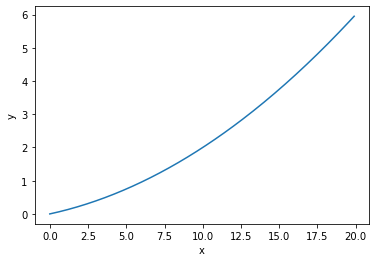

In [59]:
import matplotlib.pyplot as plt
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [60]:
numerical_diff(function_1, 5)

0.1999999999990898

In [61]:
numerical_diff(function_1, 10)

0.2999999999986347

### 2.3 편미분

In [62]:
def function_2(x):
    return np.sum(x**2)

In [64]:
function_2(np.array([2, 3]))

13

In [65]:
def function_tmp1(x0):
    return x0**2 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [66]:
def function_tmp2(x1):
    return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 3. 기울기

In [71]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [72]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [73]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [74]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 3.1 경사법

In [76]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [83]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [100]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [101]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.001, step_num=100)

array([-2.45570041,  3.27426722])

### 3.2 신경망에서의 기울기

In [106]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)    # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [107]:
net = simpleNet()
print(net.W)

[[-0.29055895  1.47747685  0.09780283]
 [ 1.18510825  2.02132012  0.14564819]]


In [114]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.89226206 2.70567422 0.18976506]


In [109]:
np.argmax(p)

1

In [112]:
t = np.array([0, 1, 0])

In [113]:
net.loss(x, t)

0.21824030771108735

In [115]:
def f(W):
    return net.loss(x, t)

In [117]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07867118 -0.11764071  0.03896953]
 [ 0.11800678 -0.17646106  0.05845429]]


In [119]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW


array([[ 0.07867118, -0.11764071,  0.03896953],
       [ 0.11800678, -0.17646106,  0.05845429]])

## 4. 학습 알고리즘 구현하기